In [2]:
# Importing essential libraries
import pandas as pd
import numpy as np

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)

# Importing libraries for statistical analysis
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Displaying all columns in a dataframe
pd.set_option('display.max_columns', None)

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Loading the Clean_Data dataset
df = pd.read_csv("data/Clean_Dataset.csv", index_col = 0)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
# df_clean_data shape
df.shape

(300153, 11)

In [5]:
# info of the Clean_Data dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [6]:
# desriptive statistics of the dataframe
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
# Dropping null values
df.dropna(inplace=True)

# Checking for null values
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
# Checking the unique values in the 'stops' column
df['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [9]:
# Mapping the categorical variables to numerical values
stops_map = {'zero': 0, 'one': 1, 'two_or_more': 2}
df['stops'] = df['stops'].map(stops_map)
df['stops'].value_counts()

stops
1    250863
0     36004
2     13286
Name: count, dtype: int64

In [10]:
# Correcting the data types
df['stops'] = df['stops'].astype(int)
df['price'] = df['price'].astype(int)
df['days_left'] = df['days_left'].astype(int)
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                 int64
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [11]:
# Stripping whitespace from all texts
def strip_whitespace(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.strip()
    return df
df = strip_whitespace(df)

In [12]:
# Checking for duplicate rows
df.duplicated().sum()

np.int64(0)

In [13]:
# Checking the info after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 27.5+ MB


Visualization of the Features

**1. Price vs Class**

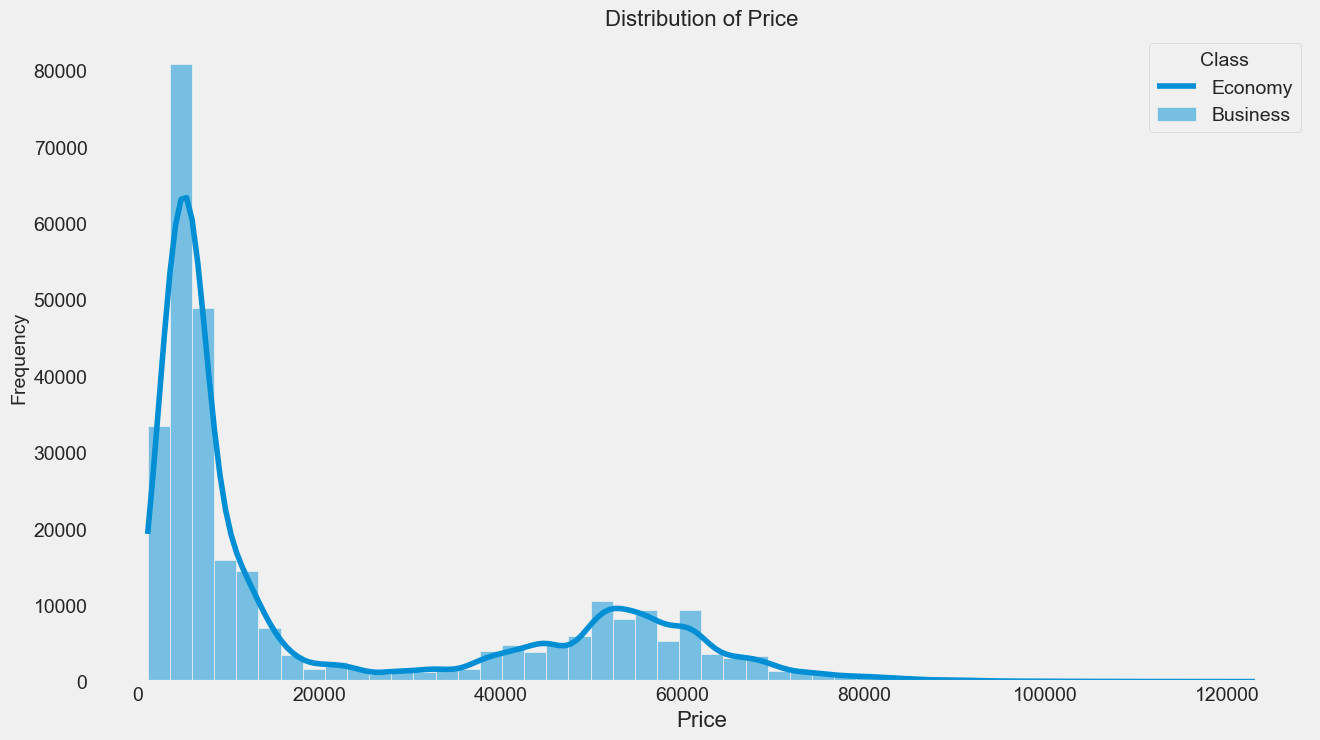

In [48]:
#Plotting the Price Distribution
plt.figure(figsize=(14, 8))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price', fontsize=16)
plt.xlabel('Price', fontsize=16)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Class', labels=['Economy', 'Business'])
plt.grid(False)
plt.show()

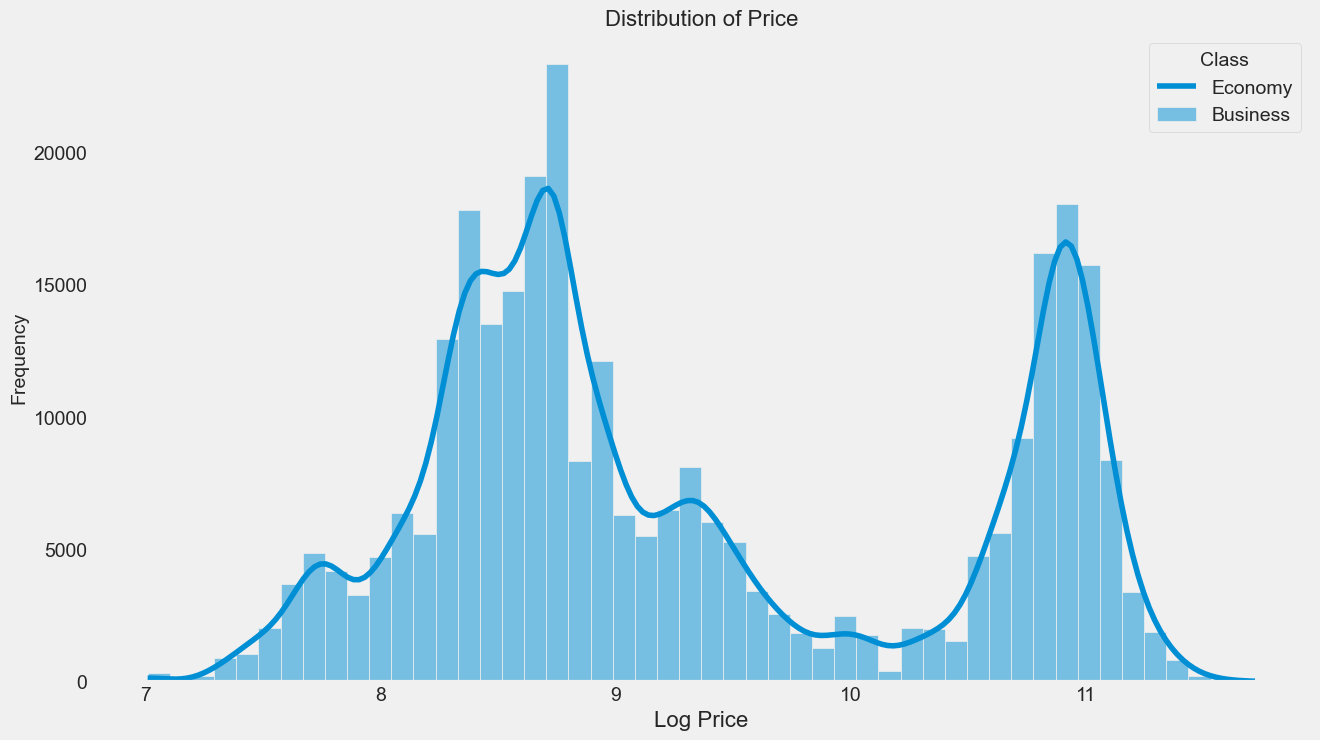

In [45]:
#Plotting the Price Distribution
plt.figure(figsize=(14, 8))
sns.histplot(np.log1p(df['price']), bins=50, kde=True)
plt.title('Distribution of Price', fontsize=16)
plt.xlabel('Log Price', fontsize=16)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Class', labels=['Economy', 'Business'])
plt.grid(False)
plt.show()

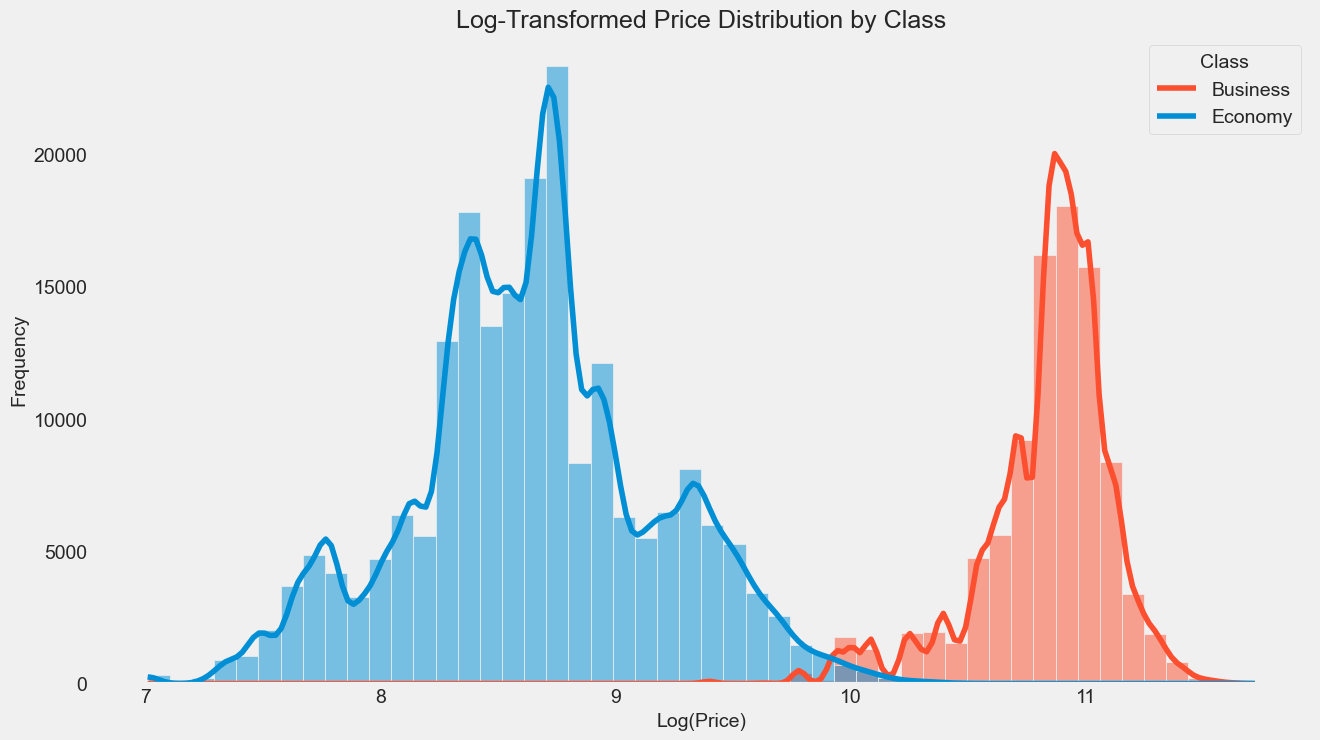

In [47]:
# Plotting the Log-Transformed Price Distribution by Class
plt.figure(figsize=(14, 8))

# Using the log-transformed price on the x-axis
sns.histplot(data=df, x=np.log1p(df['price']), hue='class', kde=True, bins=50)

# Adding the informative titles and labels
plt.title('Log-Transformed Price Distribution by Class', fontsize=18)
plt.xlabel('Log(Price)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Class', labels=['Business', 'Economy'])
plt.grid(False)
plt.show()

**Analysis of the Graph.**

The graph consist of two charts, a histogram anad a Kernel Density Estimate plot overlaid on top of it.

It has two distint parts which have different colors, blue for economy and red for business class. The x-axis represents the log-transformed price of the flights, while the y-axis shows the frequency of flights at each price point.

The blue part which represent economy is on the left of the graphand it confirms that economy tickets are on the lower range of the price tier while the orange part of the chart, representing the business tickets, is on the higher range of the price tier.

**Conclusion.**

The two distributions are almost comp;letely separate, showing a clear and signifiacnt price gap between the two classes. This proves that class is very importanmt feature in predicting the price of the ticket. The model must know whether the ticket that is to be purchased is economy or business to adjust is prices accordingly.

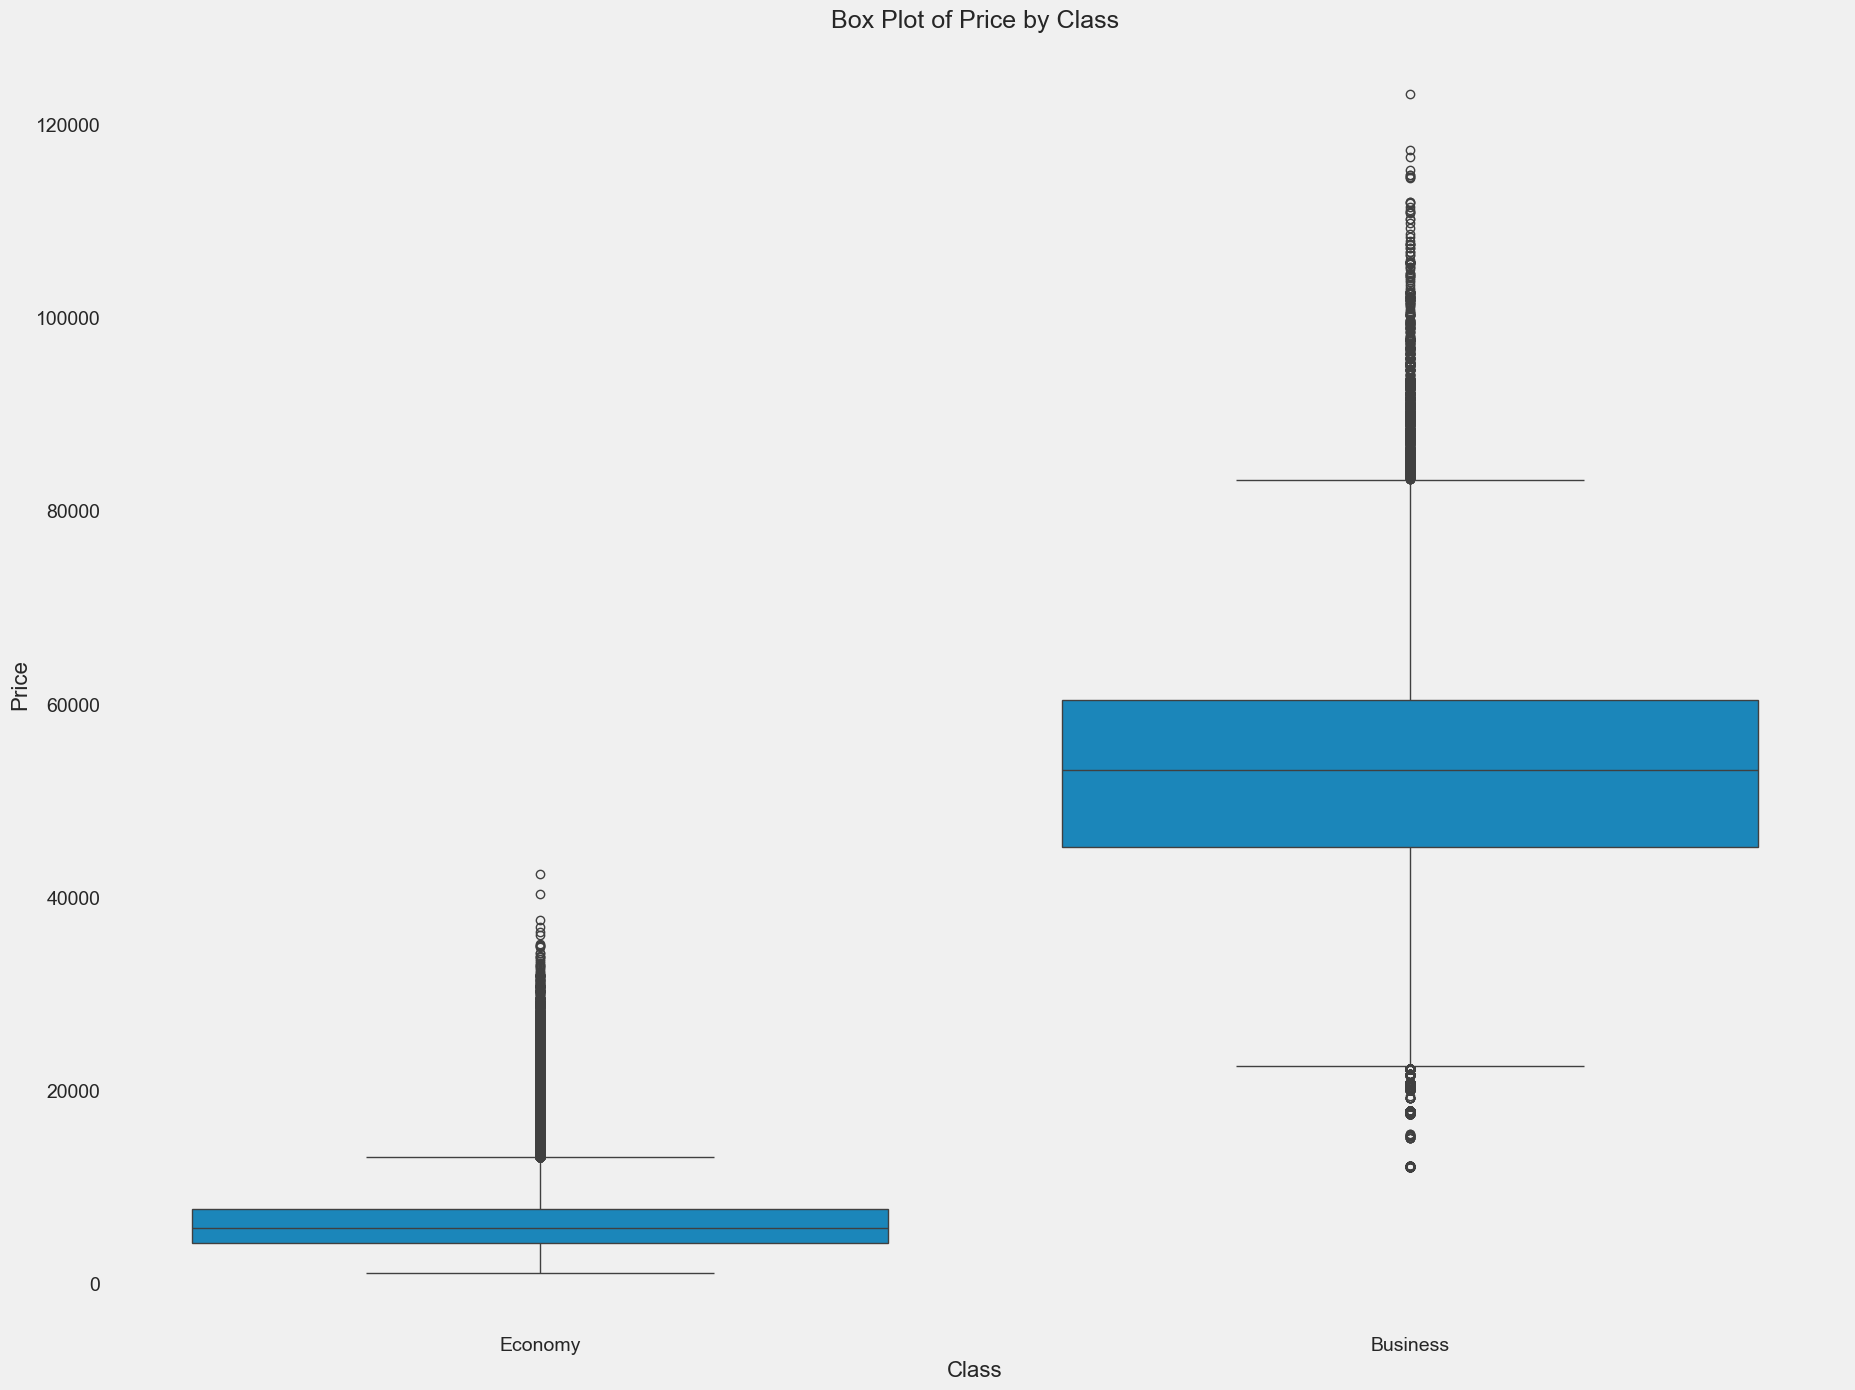

In [59]:
# Box plot for Price by Class
plt.figure(figsize=(20, 16))
sns.boxplot(x='class', y='price', data=df)
plt.title('Box Plot of Price by Class', fontsize=18)
plt.xlabel('Class', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.grid(False)
plt.show()

**Analysis of the Box plot above of Price vs Class.**

**The Economy box plot on the left.**

It is located on very low on the Price axis. This means that in general economy prices are generally cheaper and have low prices.

The box itself is very wide and narrow meaning that there isn't a lot of price variation for the economy seats. 50% of the economy tickets fall in the same narrow price range. 

There are also a few outliers in the economy tickets as seen on the upper part of the whiskers of the economy box plot.

**The Business box plot on the right.**

It is located drammatically higher than the economy tickets on the Price axis. The entire business box plot plot is above the whiskers of the economy box plot. There is no overlapping.

The box is much taller than the economy box, meaning that there is uch more price variation in the business class. There is a significance between a cheap business ticket and an expensive business ticket.

There is also a lot of outliers as seen on the bottom and top of the whiskers of the business box plot.

**Conclusion**

The separation in the two box plots, meaning no overlap whatsover, provides a powerful visual evidence that the two tickets are priced entirely in two different ways. This is very essential for our model and confirms that class is a very essential feature in my analysis when predicting the price.

In [43]:
# Performing a t-test to compare the means of Economy and Business class prices
# Null Hypothesis (H0): There is no significant difference in the average price between Economy and Business class.
# Alternative Hypothesis (H1): There is a significant difference in the average price between Economy and Business class.
# Separating the prices for each class into two different groups
economy_prices = df[df['class'] == 'Economy']['price']
business_prices = df[df['class'] == 'Business']['price']

# Performing an independent samples t-test
# equal_var=False is safer as the two groups likely have different variances
t_statistic, p_value = stats.ttest_ind(economy_prices, business_prices, equal_var=False)

print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("\nConclusion: The p-value is less than 0.05, so we reject the null hypothesis.")
    print("This confirms there is a statistically significant difference in price between Economy and Business class.")
else:
    print("\nConclusion: The p-value is not less than 0.05, so we fail to reject the null hypothesis.")

T-statistic: -1063.84
P-value: 0.0

Conclusion: The p-value is less than 0.05, so we reject the null hypothesis.
This confirms there is a statistically significant difference in price between Economy and Business class.


**2. Price vs Duration**

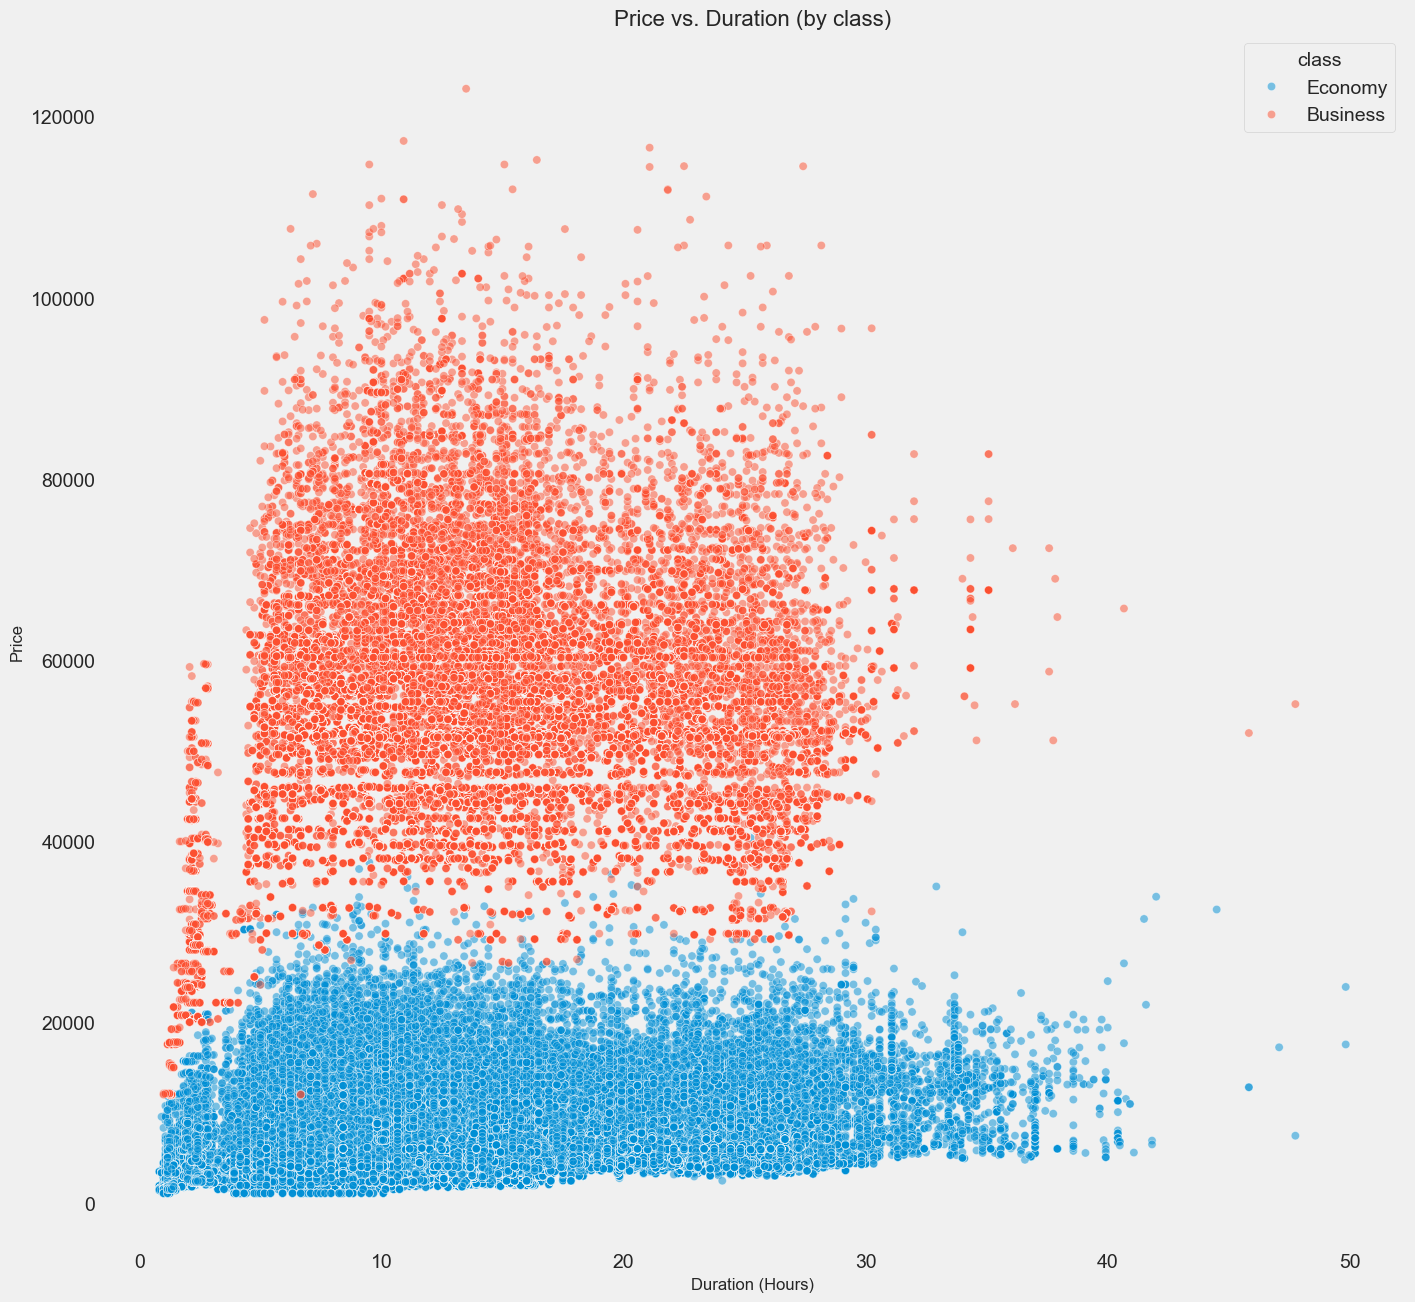

In [72]:
# Plotting scatter plot for Price vs. Duration.
plt.figure(figsize=(15, 15))
sns.scatterplot(x='duration', y='price', data=df, alpha=0.5, hue='class')
plt.title('Price vs. Duration (by class)', fontsize=16)
plt.xlabel('Duration (Hours)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(False)
plt.show()

**Analysis of the scatter plot of Price vs Duration**

This scatter plot shows that there is a very weak and unreliable relationship between duration and price when looking at the dataset as a whole. 

The wide vertical spread of prices for any given duration indicates that other factors are much more important in determining the final price.

The presence of two distinct horizontal bands strongly suggests the data is composed of two different populations, the economy and business class, and this factor is a more powerful predictor than flight duration is.

**3. Price vs Days Left**

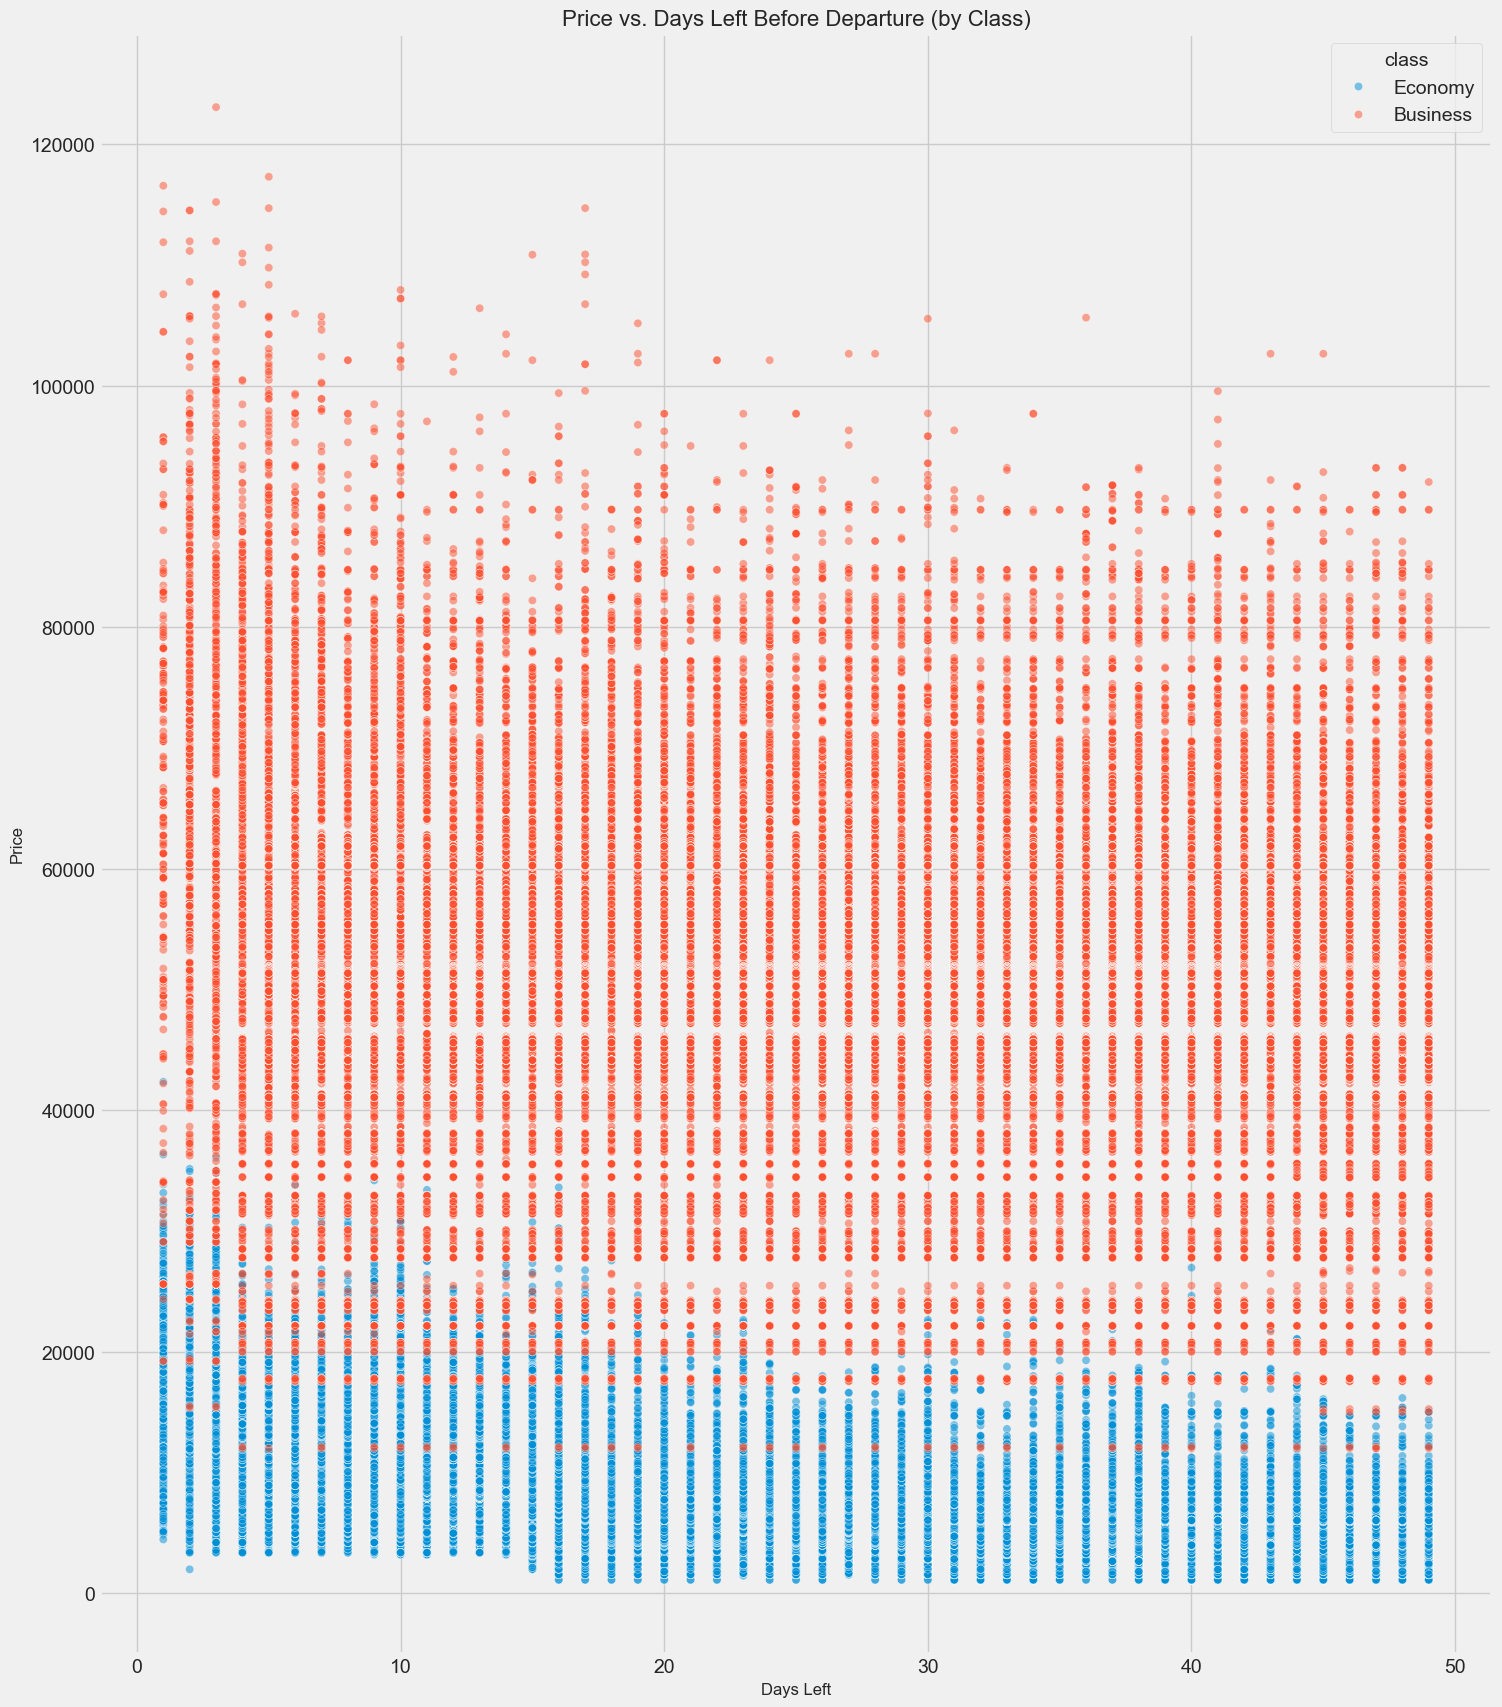

In [69]:
# Scatter plot for Price vs. Days Left
plt.figure(figsize=(16, 20))
sns.scatterplot(x='days_left', y='price', data=df, alpha=0.5, hue='class')
plt.title('Price vs. Days Left Before Departure (by Class)', fontsize=16)
plt.xlabel('Days Left', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

**Analysis of the scatter plot of Prive vs Daya left**

The entire cloud of blue (Economy) dots is in the bottom half of the graph.

The entire cloud of orange (Business) dots is in the top half.

**Conclusion:**

This confirms again that class is a dominant factor. Regardless of when you book, Business class is in a completely different price universe than Economy.

**Story 2: The "Wedge" Shape for Economy Prices**

Left Side (Days Left is low): For last-minute bookings (0-10 days), prices can range from very cheap to over 20,000. This is the period of highest price volatility.

Right Side (Days Left is high): When you book far in advance (20-50 days), the blue dots are much more tightly packed. The price range is smaller and generally lower.

**Conclusion:**

For Economy class, booking last-minute is a gamble; prices are unpredictable. Booking in advance leads to more stable and generally lower prices.

**Story 3: The "Wedge" Shape for Business Prices**

Left Side (Days Left is low): This is where we see the most extreme prices in the entire dataset, with some tickets soaring up to 120,000. This represents the high premium airlines charge for last-minute business travel. The price volatility is enormous.

Right Side (Days Left is high): When booking a business class ticket far in advance, the prices are much more stable and predictable, clustering in the 40,000 to 90,000 range.

**Conclusion.**

The relationship between price and days_left is strongly non-linear. It's not a straight line, but a curve.

This non-linear relationship is different for each class.

This tells us that a simple Linear Regression model will fail. We need a more powerful model like XGBoost or Random Forest that is capable of learning these complex, curved patterns and can understand that the rules for pricing change depending on whether the ticket is Economy or Business.

**4. Average Price vs Days Left Before Departure by Class**

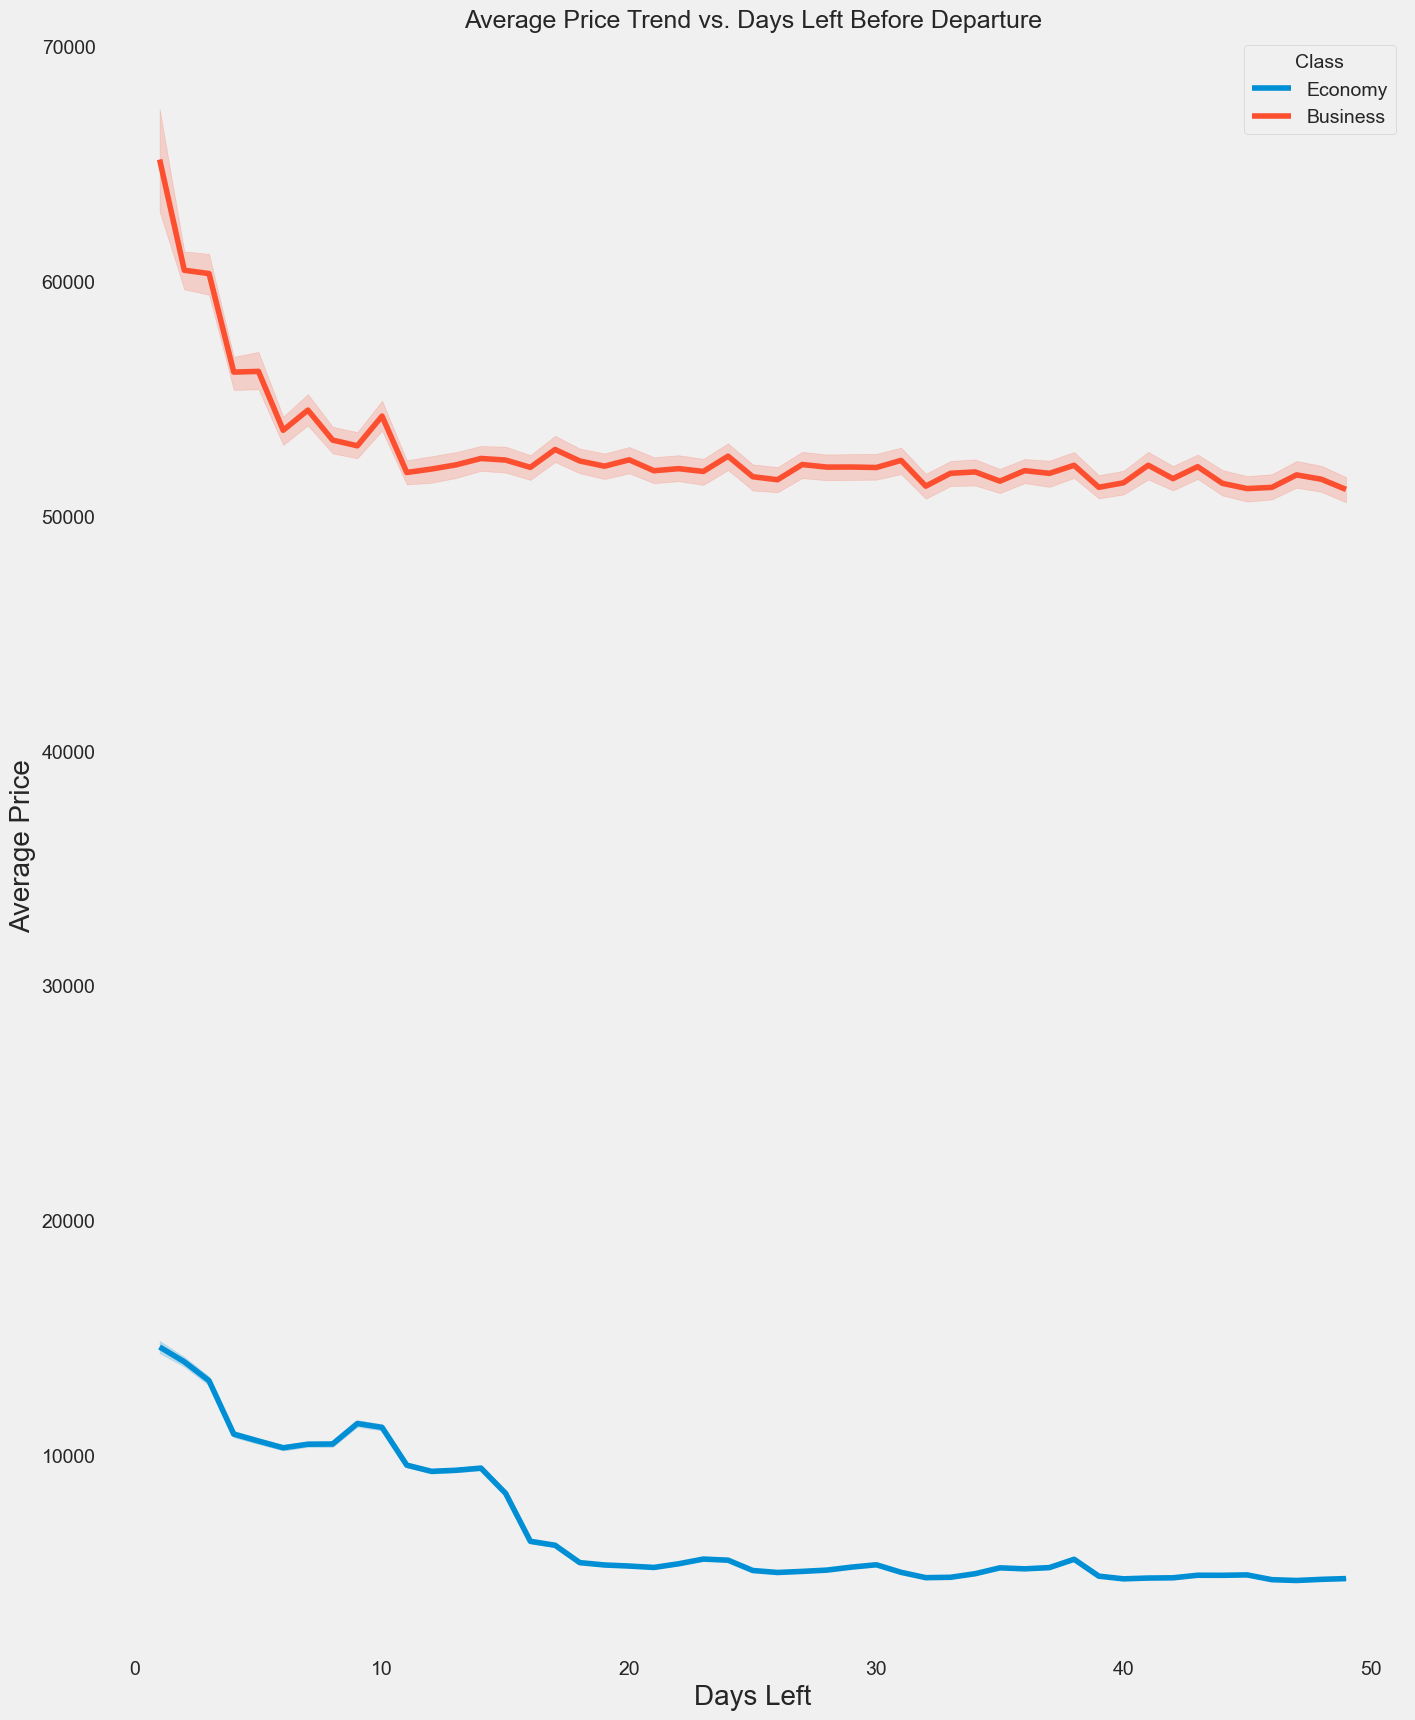

In [70]:
# Trend line for the average price of flights as the days left before departure changes.
plt.figure(figsize=(15, 20))
sns.lineplot(x='days_left', y='price', data=df, hue='class', errorbar=('ci', 95))

plt.title('Average Price Trend vs. Days Left Before Departure', fontsize=18)
plt.xlabel('Days Left', fontsize=20)
plt.ylabel('Average Price', fontsize=20)
plt.legend(title='Class')
plt.grid(False)
plt.show()

**Analysis of the trenbd line.**

**Clear Trend:**

The graph shows a clear, undeniable trend. As days_left changes or increases, the price changes in a predictable way (it goes down). This shows that this feature is very important for the model to learn on.

**Large Impact:**

The effect isn't small. The average price difference between booking 1 day in advance versus 49 days in advance is massive—tens of thousands of units for both classes. 

This large magnitude means the model must pay attention to this feature to be accurate.

**Non-Linearity:**

The trend is a curve, not a straight line. This tells our model that the relationship is complex. 

For example, the price drops very quickly in the first 10 days, and then levels off. This complexity makes the feature even more valuable for an advanced model like random forest and XGBoost to learn. They don't use a straight line, instead they will use a lot of if statements, combining a lot of factors to come up the final price prediction.

**6. Correlation Heatmap**

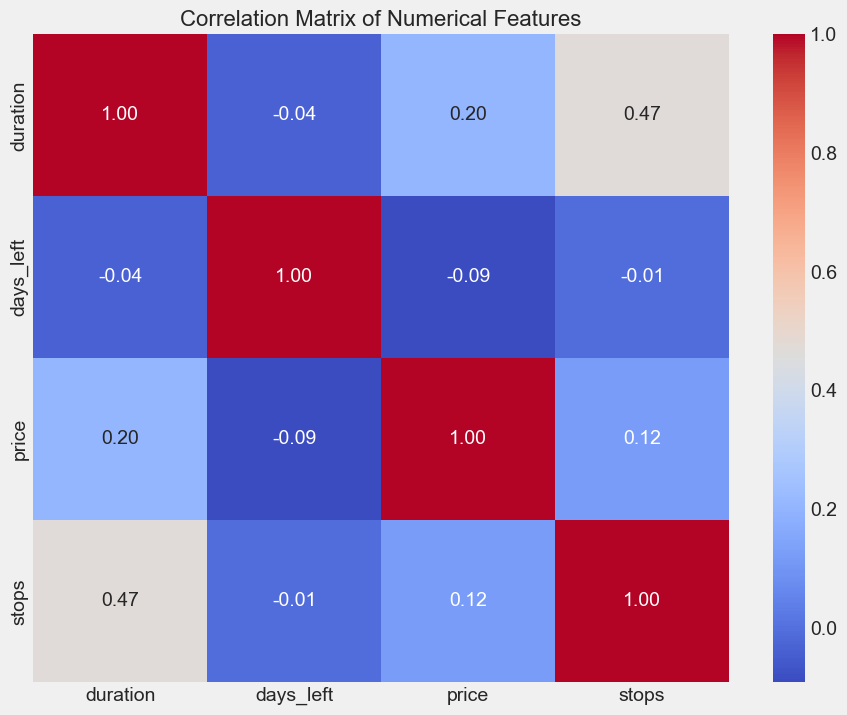

In [55]:
# Heatmap for the correlation matrix for the numerical features
numerical_df = df[['duration', 'days_left', 'price', 'stops']]
correlation_matrix = numerical_df.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

**Analyzing the Key Relationships of the numerical features with price**

**Price vs. Duration (Value = 0.20):**

This is a weak positive correlation. 

It mathematically confirms what we saw earlier in the scatter plot. 

There is a slight tendency for longer flights to be more expensive, but it's not a strong or reliable pattern. 

The color is a very light blue, confirming this weakness.

**Price vs. stops (Value = 0.12):**

This is also a very weak positive correlation. 

It suggests that having more stops has a very slight tendency to increase the price, but the relationship is even weaker than for duration.

**Price vs. days_left (Value = -0.09):**

This is the most important result on the chart. 

The number -0.09 is extremely close to zero.This does NOT mean days_left is unimportant. It means the relationship between price and days_left is not a straight line.

Our scatter plot showed a very clear and strong curve. Because the correlation coefficient only measures straight-line relationships, it gives a score close to zero for a curve. This mismatch between the strong visual pattern and the low correlation score is just the evidence of a non-linear relationship.

**Analyzing the Other Relationships in the heatmap.**

**Duration vs. stops (Value = 0.47):**

This is the strongest relationship on the chart. A score of 0.47 is a moderate positive correlation.

This makes perfect logical sense: flights with more stops will naturally have a longer total travel duration. This tells us our data is behaving as expected.

**Conclusion.**

The relationships between our numerical features and the price are not simple and linear.

The most important predictor, days_left, has a strong but non-linear effect. 

This definitively proves that we must use a more advanced model like XGBoost or Random Forest, which are specifically designed to learn these complex, curved patterns. A simple Linear Regression model would not be effective in our model building.

**7. Price vs Distribution**

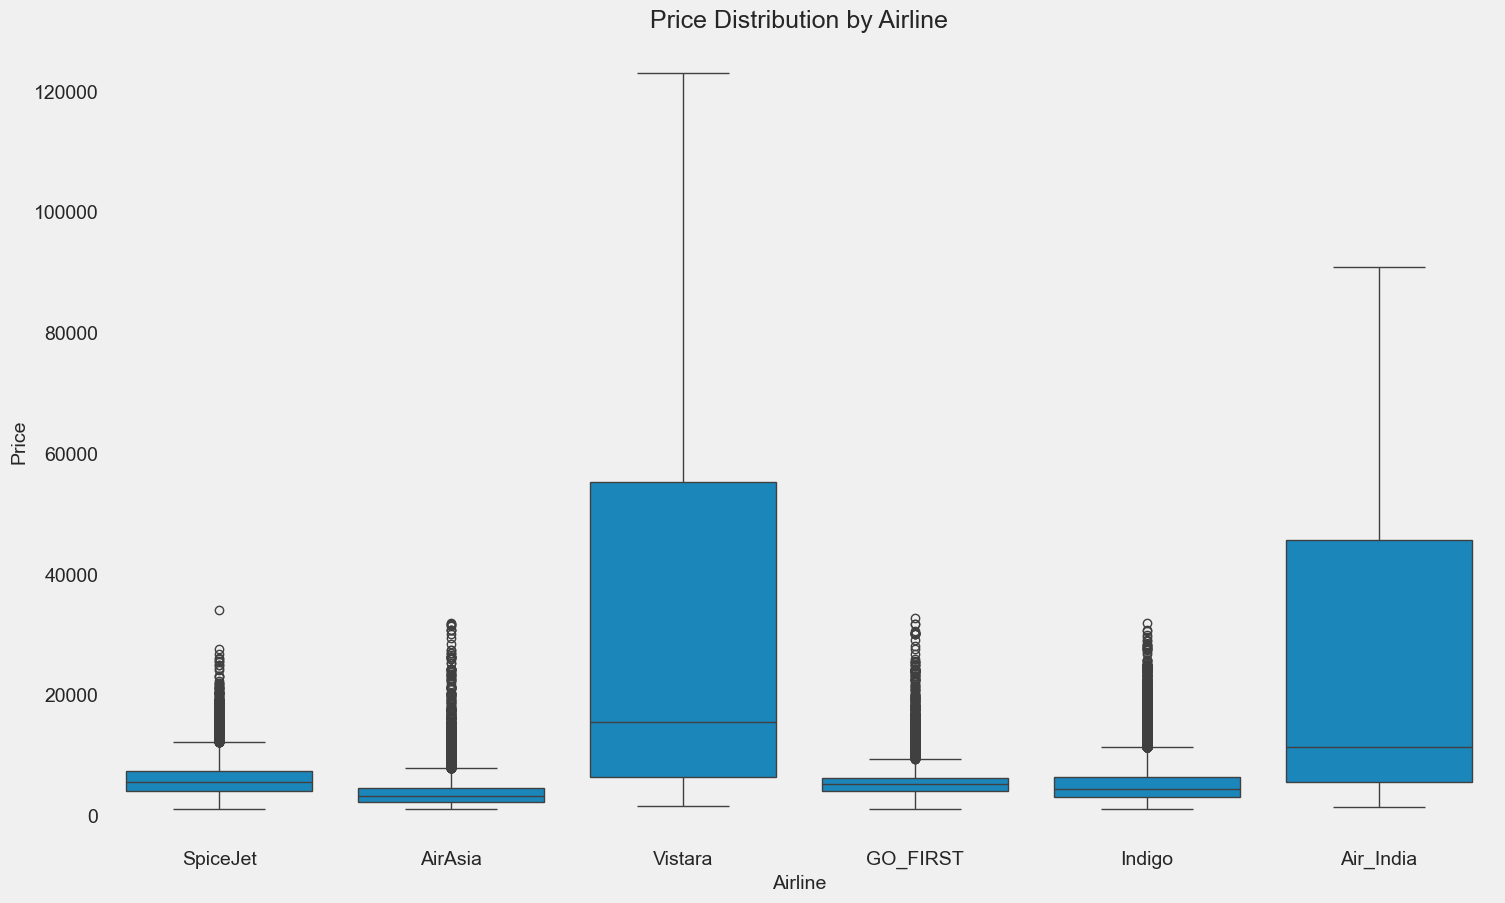

In [103]:
# Visual Analysis of the Price vs Airline
plt.figure(figsize=(16, 10))
sns.boxplot(x='airline', y='price', data=df)
plt.title('Price Distribution by Airline', fontsize=18)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(False)
plt.show()

**Analyzing the box plot**
This graph clearly shows that the airlines are split into two distinct groups:

**Group 1: The Low-Cost Carriers (The Four Flat Boxes on the bottom) - Airlines: SpiceJet, AirAsia, GO_FIRST, and Indigo.**

What we see: Their boxes are all very similar. They are short, flat, and located at the very bottom of the price scale (mostly under 10,000).

**Interpretation:** 

This is the classic signature of low-cost or budget airlines. Their business model is to offer consistently low prices. The prices don't vary much (the boxes are short), and they all compete in the same low-price market segment.

**Group 2: The Full-Service Carriers (The Two Tall Boxes) - Airlines: Vistara and Air_India.**

What we see: Their boxes are dramatically different from the first group. They are much taller, and their median prices are significantly higher.

**Interpretation:**

These are full-service airlines that operate in a different, more premium market. They offer a much wider range of prices, which is why their boxes are so tall. This is because they sell both Economy tickets (the bottom part of the box) and very expensive Business class tickets (the top part of the box and the outliers).

**The Special Case: Vistara**

Notice that the box for Vistara is the tallest of all. Its price range is enormous, from relatively cheap to the most expensive tickets in the dataset. 

This suggests that Vistara has the most diverse pricing strategy, likely with a very premium business class product that commands very high prices.

**Conclusion.**

This box plot provides strong visual proof for our hypothesis that airline is a significant predictor of price. The plot clearly shows that the airline market in this dataset is segmented. 

Knowing whether a flight is with a budget carrier like Indigo versus a full-service carrier like Vistara gives our model a huge amount of information to help it predict the price accurately. This confirms airline is an essential feature.

In [78]:
# Anova test to compare the means of prices across different airlines
model = ols('price ~ C(airline)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("--- ANOVA Results for Airline vs. Price ---")
print(anova_table)

# Extracting and interpreting the p-value
p_value = anova_table['PR(>F)'].iloc[0]
if p_value < 0.05:
    print("\nConclusion: The p-value is less than 0.05.")
    print("This confirms there is a statistically significant difference in price among the different airlines.")
else:
    print("\nConclusion: The p-value is not less than 0.05.")

--- ANOVA Results for Airline vs. Price ---
                  sum_sq        df             F  PR(>F)
C(airline)  3.443051e+13       5.0  17194.402096     0.0
Residual    1.202044e+14  300147.0           NaN     NaN

Conclusion: The p-value is less than 0.05.
This confirms there is a statistically significant difference in price among the different airlines.


To mathematically confirm the pattern we saw in the box plot, we perform an ANOVA (Analysis of Variance) test. This statistical test is designed to determine if there is a significant difference in the mean (average) of a numerical variable across several different groups or categories.

**Our Hypothesis Setup**

**Null Hypothesis (H0)**: There is no significant difference in the average flight price among the different airlines. Any variation we see is just due to random chance.

**Alternative Hypothesis (Ha)**: There is a significant difference in the average flight price among at least two of the airlines.

**Interpreting the Results**

Our test produced the following key results:

**The F-statistic: 17194.48**

This number represents the ratio of the variance between the airline groups to the variance within the airline groups. 

A very large F-statistic, like the one we have, indicates that the differences in the average prices between airlines (e.g., the difference between Vistara and SpiceJet) are vastly greater than the random price variations within a single airline. 

This provides strong evidence against the null hypothesis.

**The p-value (PR(>F)): 0.0**

This is the most critical result. The p-value is the probability of observing such a large F-statistic if the null hypothesis were true (i.e., if all airlines truly had the same average price). 

A p-value of 0.0 signifies that the true probability is an extremely small number, so close to zero that it's rounded down. This means it is practically impossible for the large price differences we see to be a result of random chance.

**Final Conclusion**

Since our calculated p-value (0.0) is much smaller than the standard significance level of 0.05, we have overwhelming statistical evidence to reject the null hypothesis.

We can therefore conclude with high confidence that the airline has a statistically significant effect on the flight price. This confirms that airline is a valuable and important feature to include in our machine learning model.

**8. Price vs Stops**

--- Visualizing Average Price by Number of Stops and Class ---


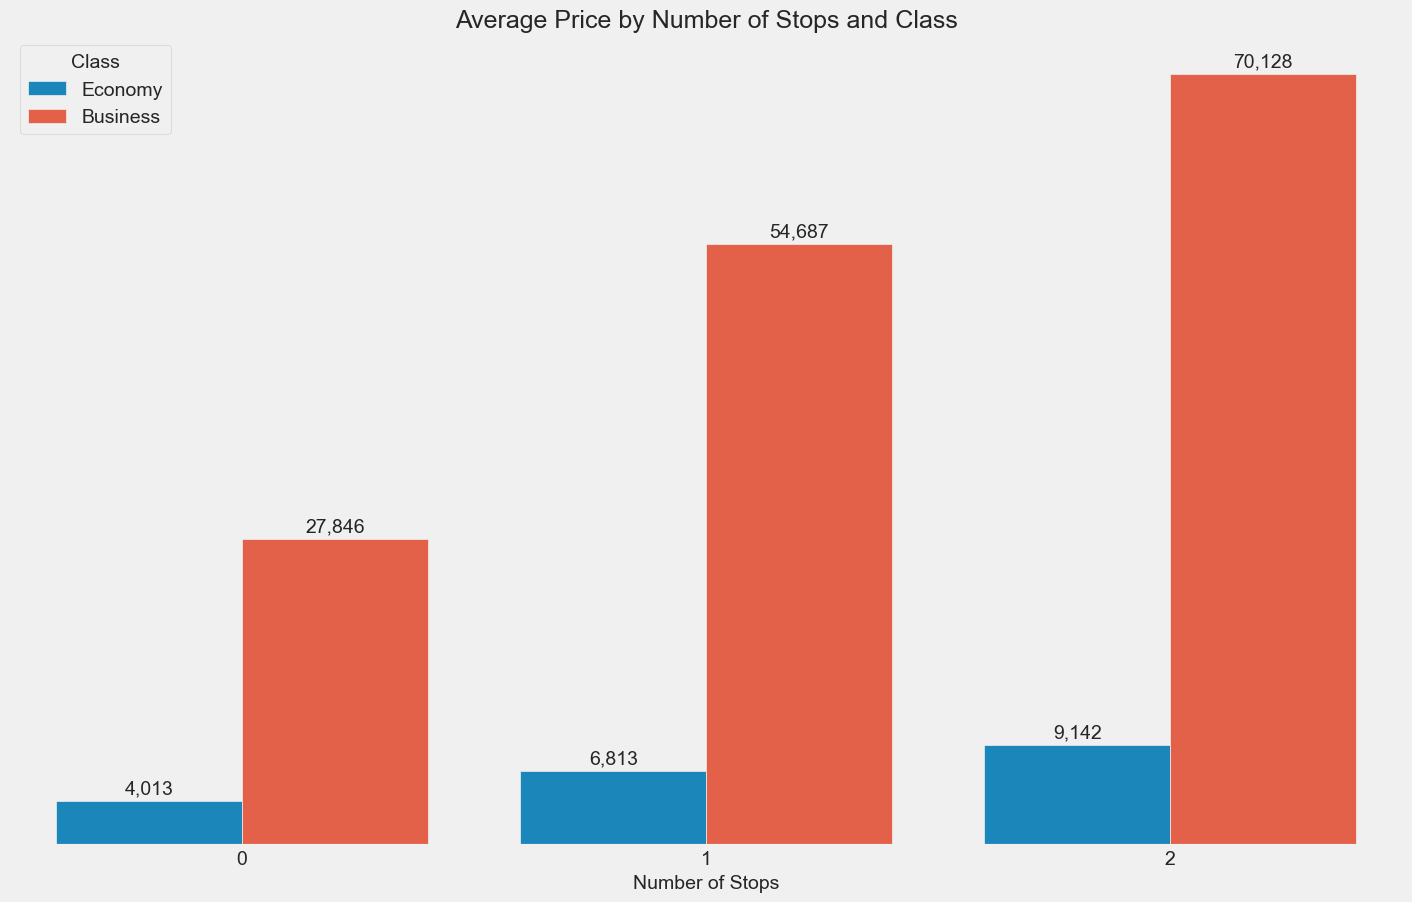

In [101]:
print("--- Visualizing Average Price by Number of Stops and Class ---")
plt.figure(figsize=(16, 10))

# By adding hue='class', seaborn will create separate bars for each class
# within each stop category (0, 1, and 2).
ax = sns.barplot(x='stops', y='price', hue='class', data=df, errorbar=None)

# Loop through each bar in the plot to add the data label
for p in ax.patches:
    height = p.get_height()
    # Only add a label if the bar has a visible height
    if height > 0:
        ax.annotate(f'{height:,.0f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center',
                    va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

# --- Customizing the Final Look ---
ax.set_title('Average Price by Number of Stops and Class', fontsize=18)
ax.set_xlabel('Number of Stops', fontsize=14)
ax.set_ylabel('')  # Remove y-axis label
ax.set_yticks([]) # Remove y-axis ticks

plt.legend(title='Class')
plt.show()

**Final Analysis: The True Relationship Between Stops, Class, and Price**

Our exploration of the stops feature has revealed a fascinating and important interaction, showcasing the need for detailed, multi-variable analysis.

**Initial Observation from the Box Plot**

When we first plotted price against the number of stops using a box plot, we observed a confusing, non-linear pattern:

Flights with **1** stop appeared to be, on **average**, the most **expensive** and had the widest range of prices.

Flights with **0** stops and **2** stops looked similar and cheaper.

Based on this graph alone, our initial hypothesis would have been that the 1-stop category is a special case, likely representing premium long-haul routes.

The Deeper Story from the Grouped Bar Chart

To investigate further, I created a grouped bar chart that separated the prices by class within each stops category. This new graph revealed the true underlying trend.

**Consistent Trend within Each Class:** For both Economy class and Business class individually, the average price consistently increases as the number of stops increases. (e.g., a 2-stop Economy ticket is more expensive than a 1-stop Economy ticket).

**The "Hidden Variable":** The reason the first box plot was misleading is due to the uneven mix of ticket classes. The 1-stop category contains a disproportionately **high number** of very expensive Business Class tickets compared to the other categories. The massive average price of these Business tickets **skewed** the overall average of the entire 1-stop category upwards, making it seem like the most expensive.

**Final Conclusion**

The initial box plot showed an apparent anomaly, but the more detailed grouped bar chart revealed the true relationship. The number of stops has a clear, positive correlation with price for both Economy and Business classes.

The key takeaway is that the model must learn this interaction effect: the final price is not just based on the number of stops, but on the combination of stops AND class. This complex relationship is a powerful justification for using an advanced model like XGBoost, which can automatically detect and learn these kinds of multi-feature interactions.

In [20]:
# Group by route and stops, count how many flights there are
route_counts = df.groupby(['source_city', 'destination_city', 'stops']).size().reset_index(name='flight_count')

# Create a 'route' column for better readability
route_counts['route'] = route_counts['source_city'] + ' → ' + route_counts['destination_city']

# Rearranged nicely
route_counts = route_counts[['route', 'stops', 'flight_count']]

# Sort and display
route_counts.sort_values(by=['route', 'stops'], inplace=True)
print(route_counts)

                  route  stops  flight_count
0   Bangalore → Chennai      0           480
1   Bangalore → Chennai      1          5427
2   Bangalore → Chennai      2           503
3     Bangalore → Delhi      0          2211
4     Bangalore → Delhi      1         11329
..                  ...    ...           ...
85   Mumbai → Hyderabad      1          9362
86   Mumbai → Hyderabad      2           335
87     Mumbai → Kolkata      0           933
88     Mumbai → Kolkata      1         10921
89     Mumbai → Kolkata      2           748

[90 rows x 3 columns]


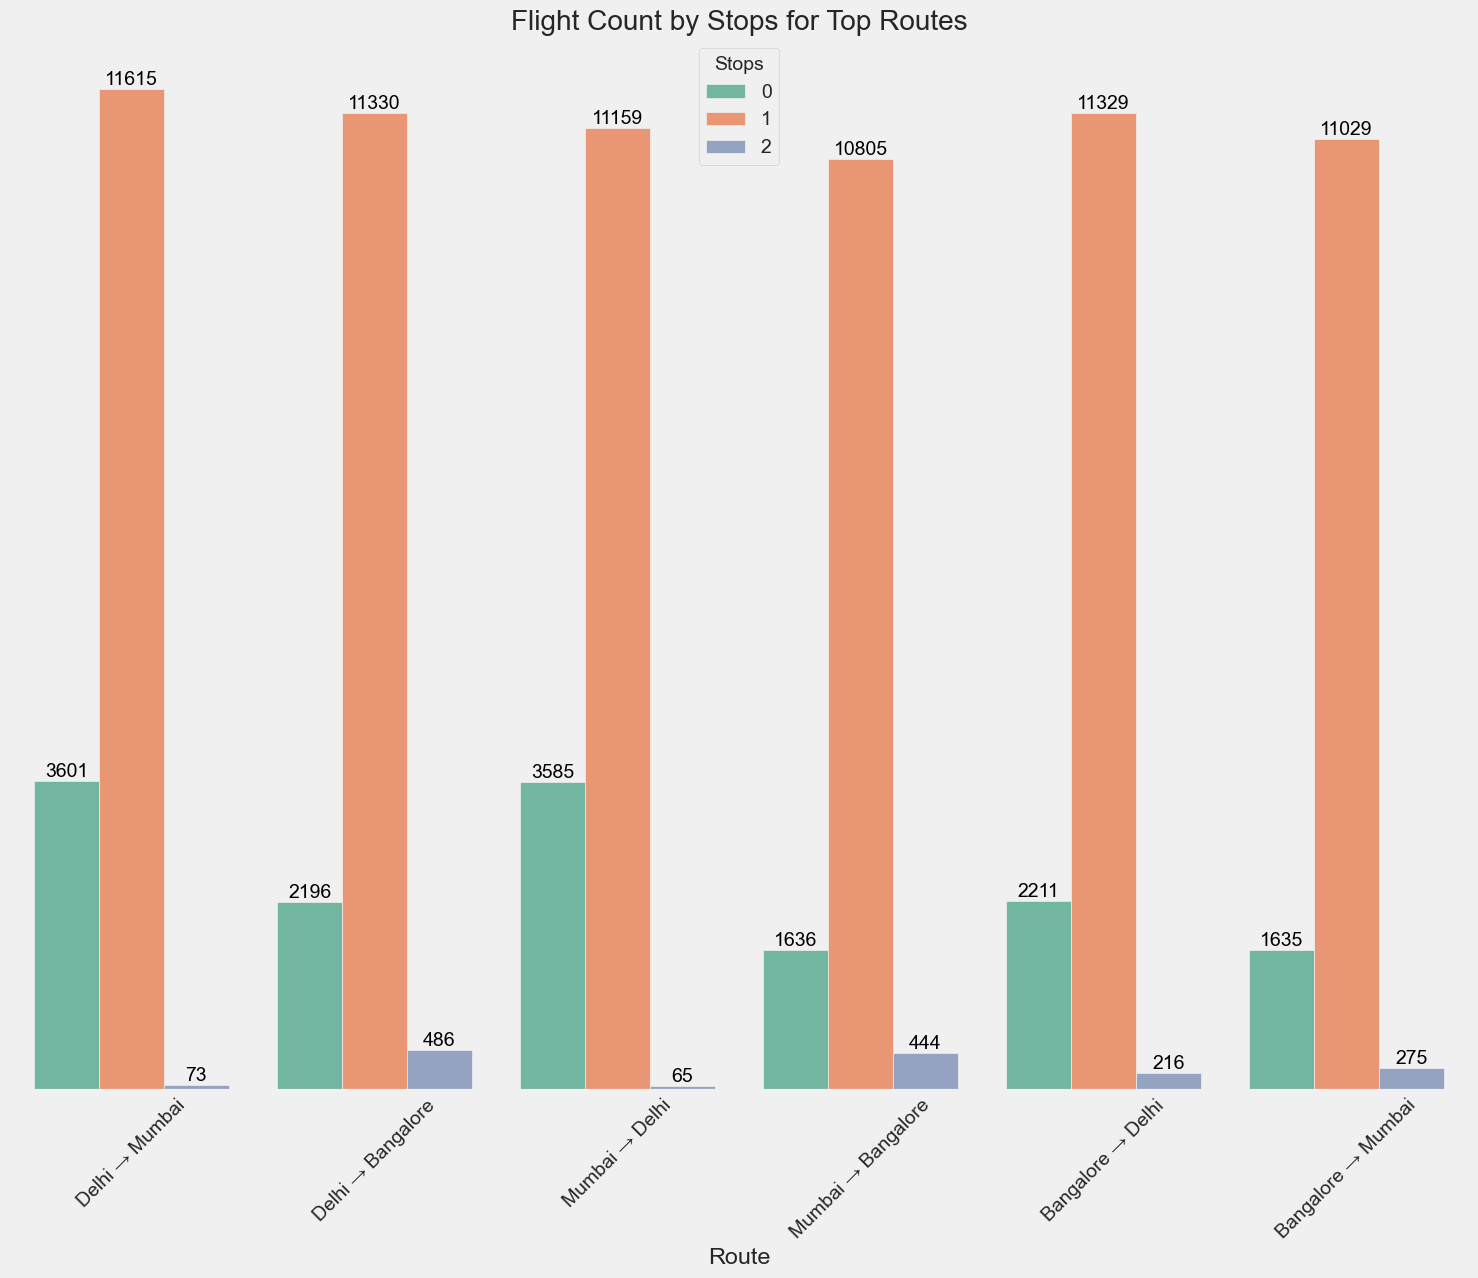

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of stop counts for top routes
top_routes = df['route'].value_counts().head(6).index.tolist()
df_top_routes = df[df['route'].isin(top_routes)]

plt.figure(figsize=(15, 13))
ax = sns.countplot(data=df_top_routes, x='route', hue='stops', palette='Set2')

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=14, color='black')

# Remove y-axis
ax.yaxis.set_visible(False)
ax.set_ylabel(None)

# Final touches
plt.title("Flight Count by Stops for Top Routes")
plt.xlabel("Route")
plt.xticks(rotation=45)
plt.legend(title="Stops")
plt.grid(False)
plt.tight_layout()
plt.show()

In [85]:
# Define the model formula: "price is explained by the category of stops"
# We will wrap 'stops' in C() to ensure statsmodels treats it as a categorical variable
model = ols('price ~ C(stops)', data=df).fit()

# Getting the ANOVA table from the fitted model
anova_table = sm.stats.anova_lm(model, typ=2)

print("--- ANOVA Results for Stops vs. Price ---")
print(anova_table)

# Extracting and interpret the p-value
p_value = anova_table['PR(>F)'].iloc[0]
if p_value < 0.05:
    print("\nConclusion: The p-value is less than 0.05.")
    print("This confirms there is a statistically significant difference in price based on the number of stops.")
else:
    print("\nConclusion: The p-value is not less than 0.05.")

--- ANOVA Results for Stops vs. Price ---
                sum_sq        df            F  PR(>F)
C(stops)  6.397808e+12       2.0  6477.130362     0.0
Residual  1.482371e+14  300150.0          NaN     NaN

Conclusion: The p-value is less than 0.05.
This confirms there is a statistically significant difference in price based on the number of stops.


**The F-statistic (F column): 6477.13**

**What it is:** This number compares how much the average price varies between the stop categories (0, 1, and 2) versus how much the price varies within each category.

**What it means:** An F-statistic this large (6,477 is huge!) tells us that the differences in average price between 0-stop, 1-stop, and 2-stop flights are massive compared to the random noise within each group. It's a very strong signal that the groups are different.

**The p-value (PR(>F) column): 0.0**

**What it is:** This is the probability of seeing such a large F-statistic if the number of stops actually had no effect on the average price (the "null hypothesis").

**What it means:** The p-value is less than 0.05. A p-value of 0.0 means the probability is practically zero. It is statistically impossible that the price differences you saw in the box plot (where 1-stop flights were much more expensive) are just a random coincidence.

**The Final Conclusion**

Both from the box plot and the ANOVA test, the stops feature is another important predictor of price. The model will need to learn the specific, non-linear pattern that 1-stop flights are in a different price category than 0-stop or 2-stop flights.

**9. Price vs Source City**

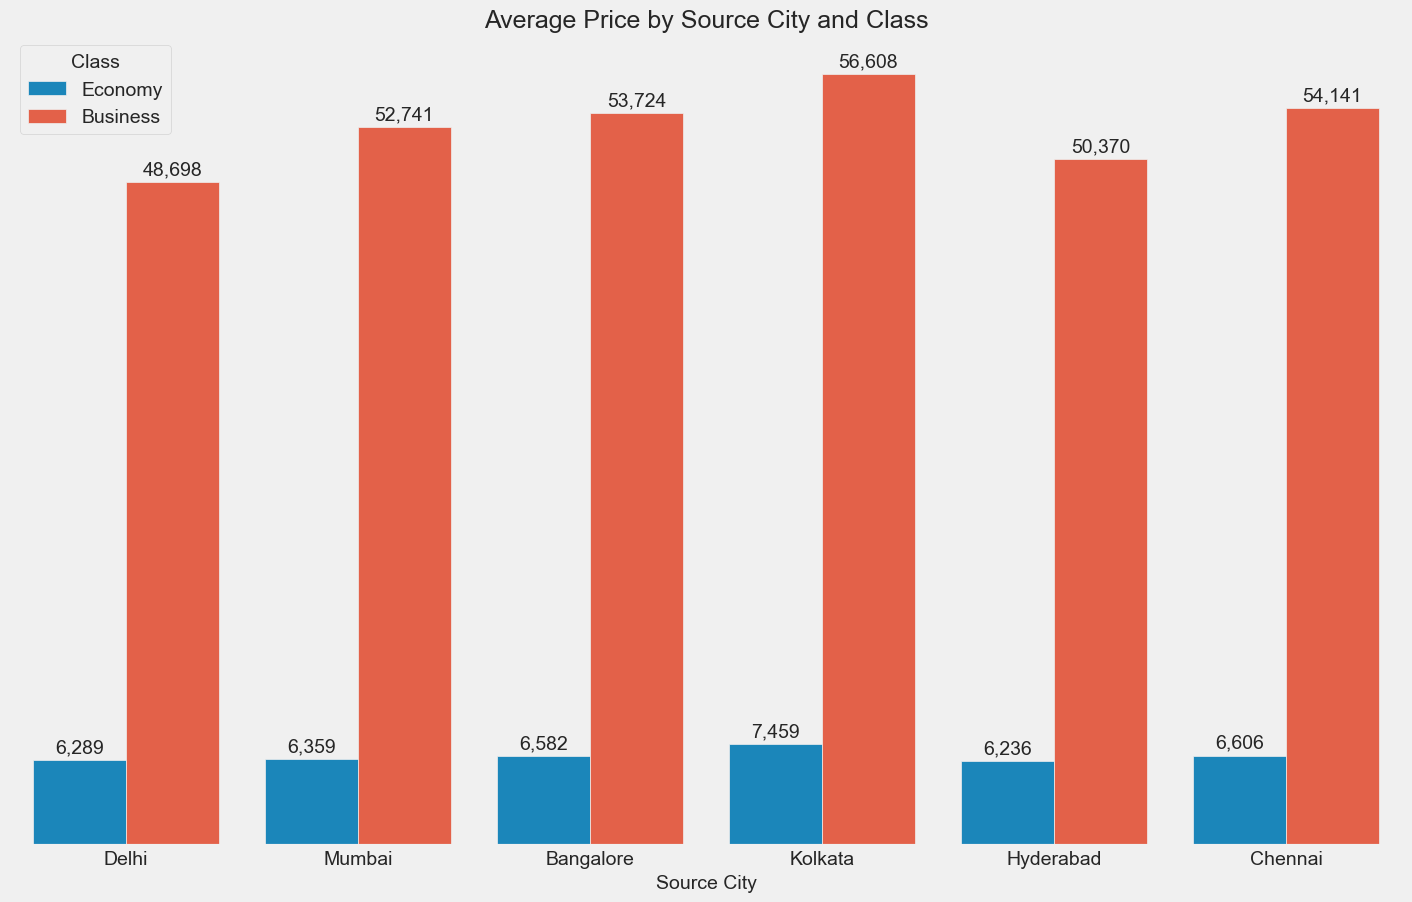

In [100]:
# Grouped Bar chart for Average Price by Source City and Class
plt.figure(figsize=(16, 10))

# Creating the bar plot using 'source_city' on the x-axis
ax = sns.barplot(x='source_city', y='price', hue='class', data=df, errorbar=None)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:,.0f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center',
                    va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

ax.set_title('Average Price by Source City and Class', fontsize=18)
ax.set_xlabel('Source City', fontsize=14)
ax.set_ylabel('')
ax.set_yticks([])
plt.legend(title='Class')
plt.show()

**Analyzing the Graph's Story**

**Insight 1: The "Class" Gap is the Biggest Factor**

**Observation:** In every single city, the orange "Business" bar is massively taller than the blue "Economy" bar. In Kolkata, for example, the average Business ticket (56,608) is more than 7.5 times as expensive as the average Economy ticket (7,459).

**Conclusion:** This reinforces our most important finding. The primary determinant of a flight's price is its class. This holds true regardless of the departure city.

**Insight 2:** Business Class Prices Vary Significantly by Source City

**Observation:**There is a clear and significant difference. The average Business price for a flight departing from Kolkata (56,608) is much higher than for a flight departing from Delhi (48,698). The price difference between the most and least expensive departure city for a business ticket is almost 8,000.

**Conclusion:** The departure city has a strong influence on the price of premium (Business class) travel.

**Insight 3:** Economy Class Prices are Much More Stable

Observation: Now, let's compare only the blue bars. They are all very close in height. The most expensive average Economy ticket (from Kolkata at 7,459) is only about 1,200 more expensive than the cheapest (from Hyderabad at 6,236).

**Conclusion:** For economy travel, the departure city has a much smaller impact on the average price. Prices are far more consistent across all departure locations for this class.

**Final Takeawat**
This graph tells a story about feature interaction. The importance of the source_city feature depends on the class. The machine learning model must be powerful enough to learn this complex rule: **"When predicting the price, if the class is 'Business', pay close attention to the source_city. If the class is 'Economy', the source_city is a much less important factor."**

**10. Price vs destination_city**

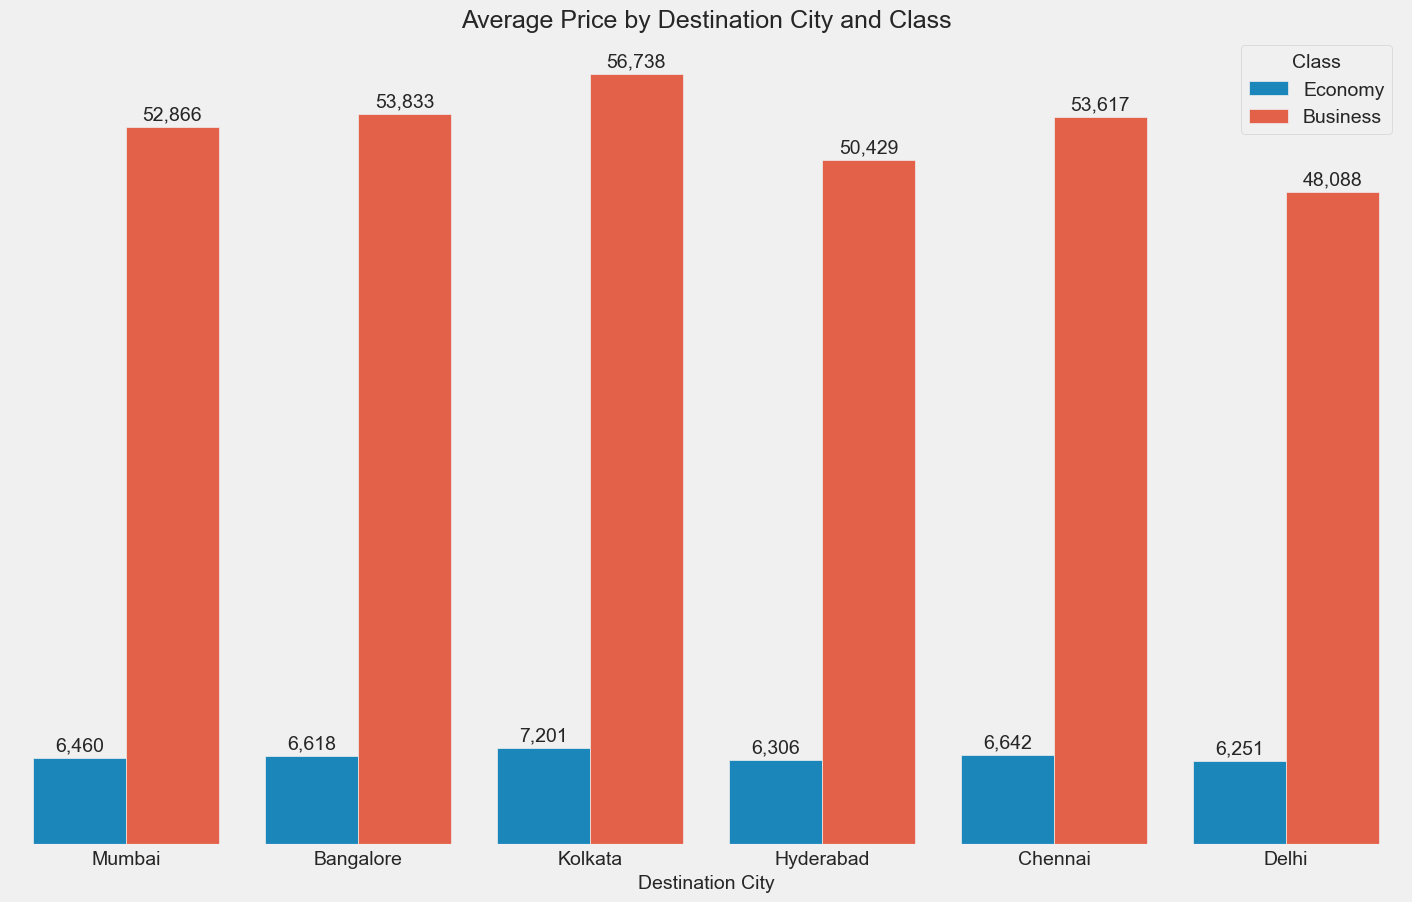

In [99]:
#Grouped Bar Plot for Average Price by Destination City and Class
plt.figure(figsize=(16, 10))
ax = sns.barplot(x='destination_city', y='price', hue='class', data=df, errorbar=None)

# Looping through each bar in the plot to add the data label
for p in ax.patches:
    # Getting the height of the bar
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:,.0f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', 
                    va='center',
                    xytext=(0, 9), 
                    textcoords='offset points')

ax.set_title('Average Price by Destination City and Class', fontsize=18)
ax.set_xlabel('Destination City', fontsize=14)
ax.set_ylabel('')
ax.set_yticks([])
plt.legend(title='Class')
plt.show()

**Analyzing the Graph's Story**

**Insight 1: The Immense "Class" Gap is Universal**

**Observation:** The orange bar is always dramatically taller than the blue bar next to it. 

For example, in Mumbai, the average Business ticket (52,866) is more than 8 times as expensive as the average Economy ticket (6,460).

**Conclusion:** This is the most dominant pattern in our entire dataset. The single biggest factor determining a flight's price is its class. This is true for every single destination.

**Insight 2: Business Class Prices are Sensitive to Destination**

**Observation:** There is a significant difference. The average Business price for a flight to Kolkata (56,738) is noticeably higher than for a flight to Delhi (48,088). There is a range of over 8,000 in average price depending on the destination.

**Conclusion:** For premium (Business class) travel, the destination city has a significant impact on the average price.

**Insight 3: Economy Class Prices are Very Stable**

**Observation:** Now, compare only the blue bars. They are all very similar in height. The most expensive average Economy ticket (to Kolkata at 7,201) is only about 1,000 more expensive than the cheapest (to Delhi at 6,251).

**Conclusion:** For economy travel, the destination city has a much smaller impact on the average price. Prices are very consistent across all destinations.

**Final Conclusion:**

This chart tells a sophisticated story about the interaction between features. The effect of the destination_city on price is not simple; it depends on the class. Our machine learning model will need to be powerful enough to learn this complex rule: **"If the class is Business, pay close attention to the destination city. But if the class is Economy, the destination city is much less important."**

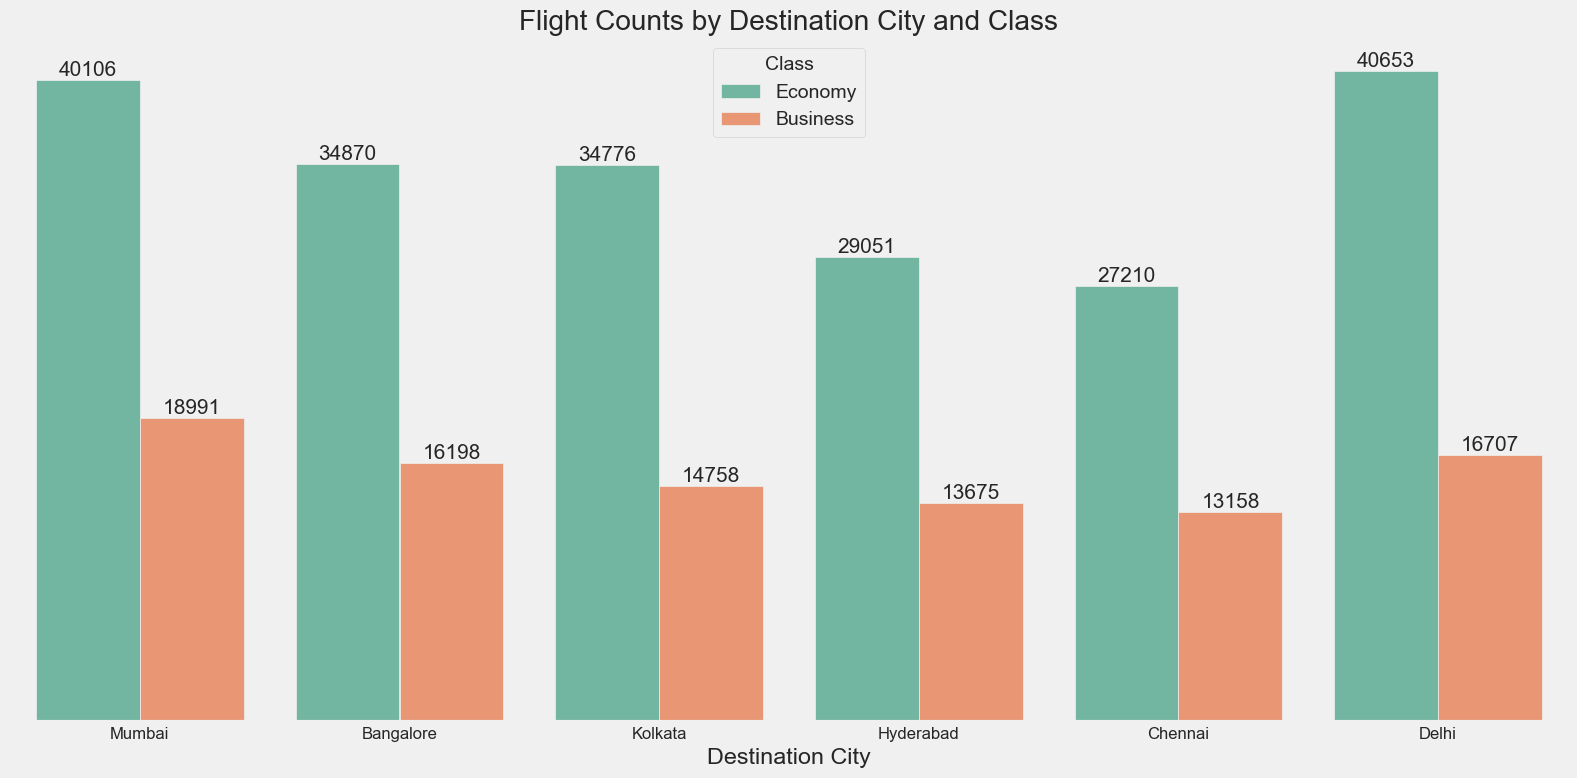

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
ax = sns.countplot(data=df, x='destination_city', hue='class', palette='Set2')

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=15)

# Remove y-axis
ax.yaxis.set_visible(False)
ax.set_ylabel(None)

# Tidy up
plt.title("Flight Counts by Destination City and Class")
plt.xlabel("Destination City")
plt.xticks(rotation=0, fontsize=12)
plt.legend(title="Class")
plt.grid(False)
plt.tight_layout()
plt.show()


**10. Price vs Departure v Arrival times**

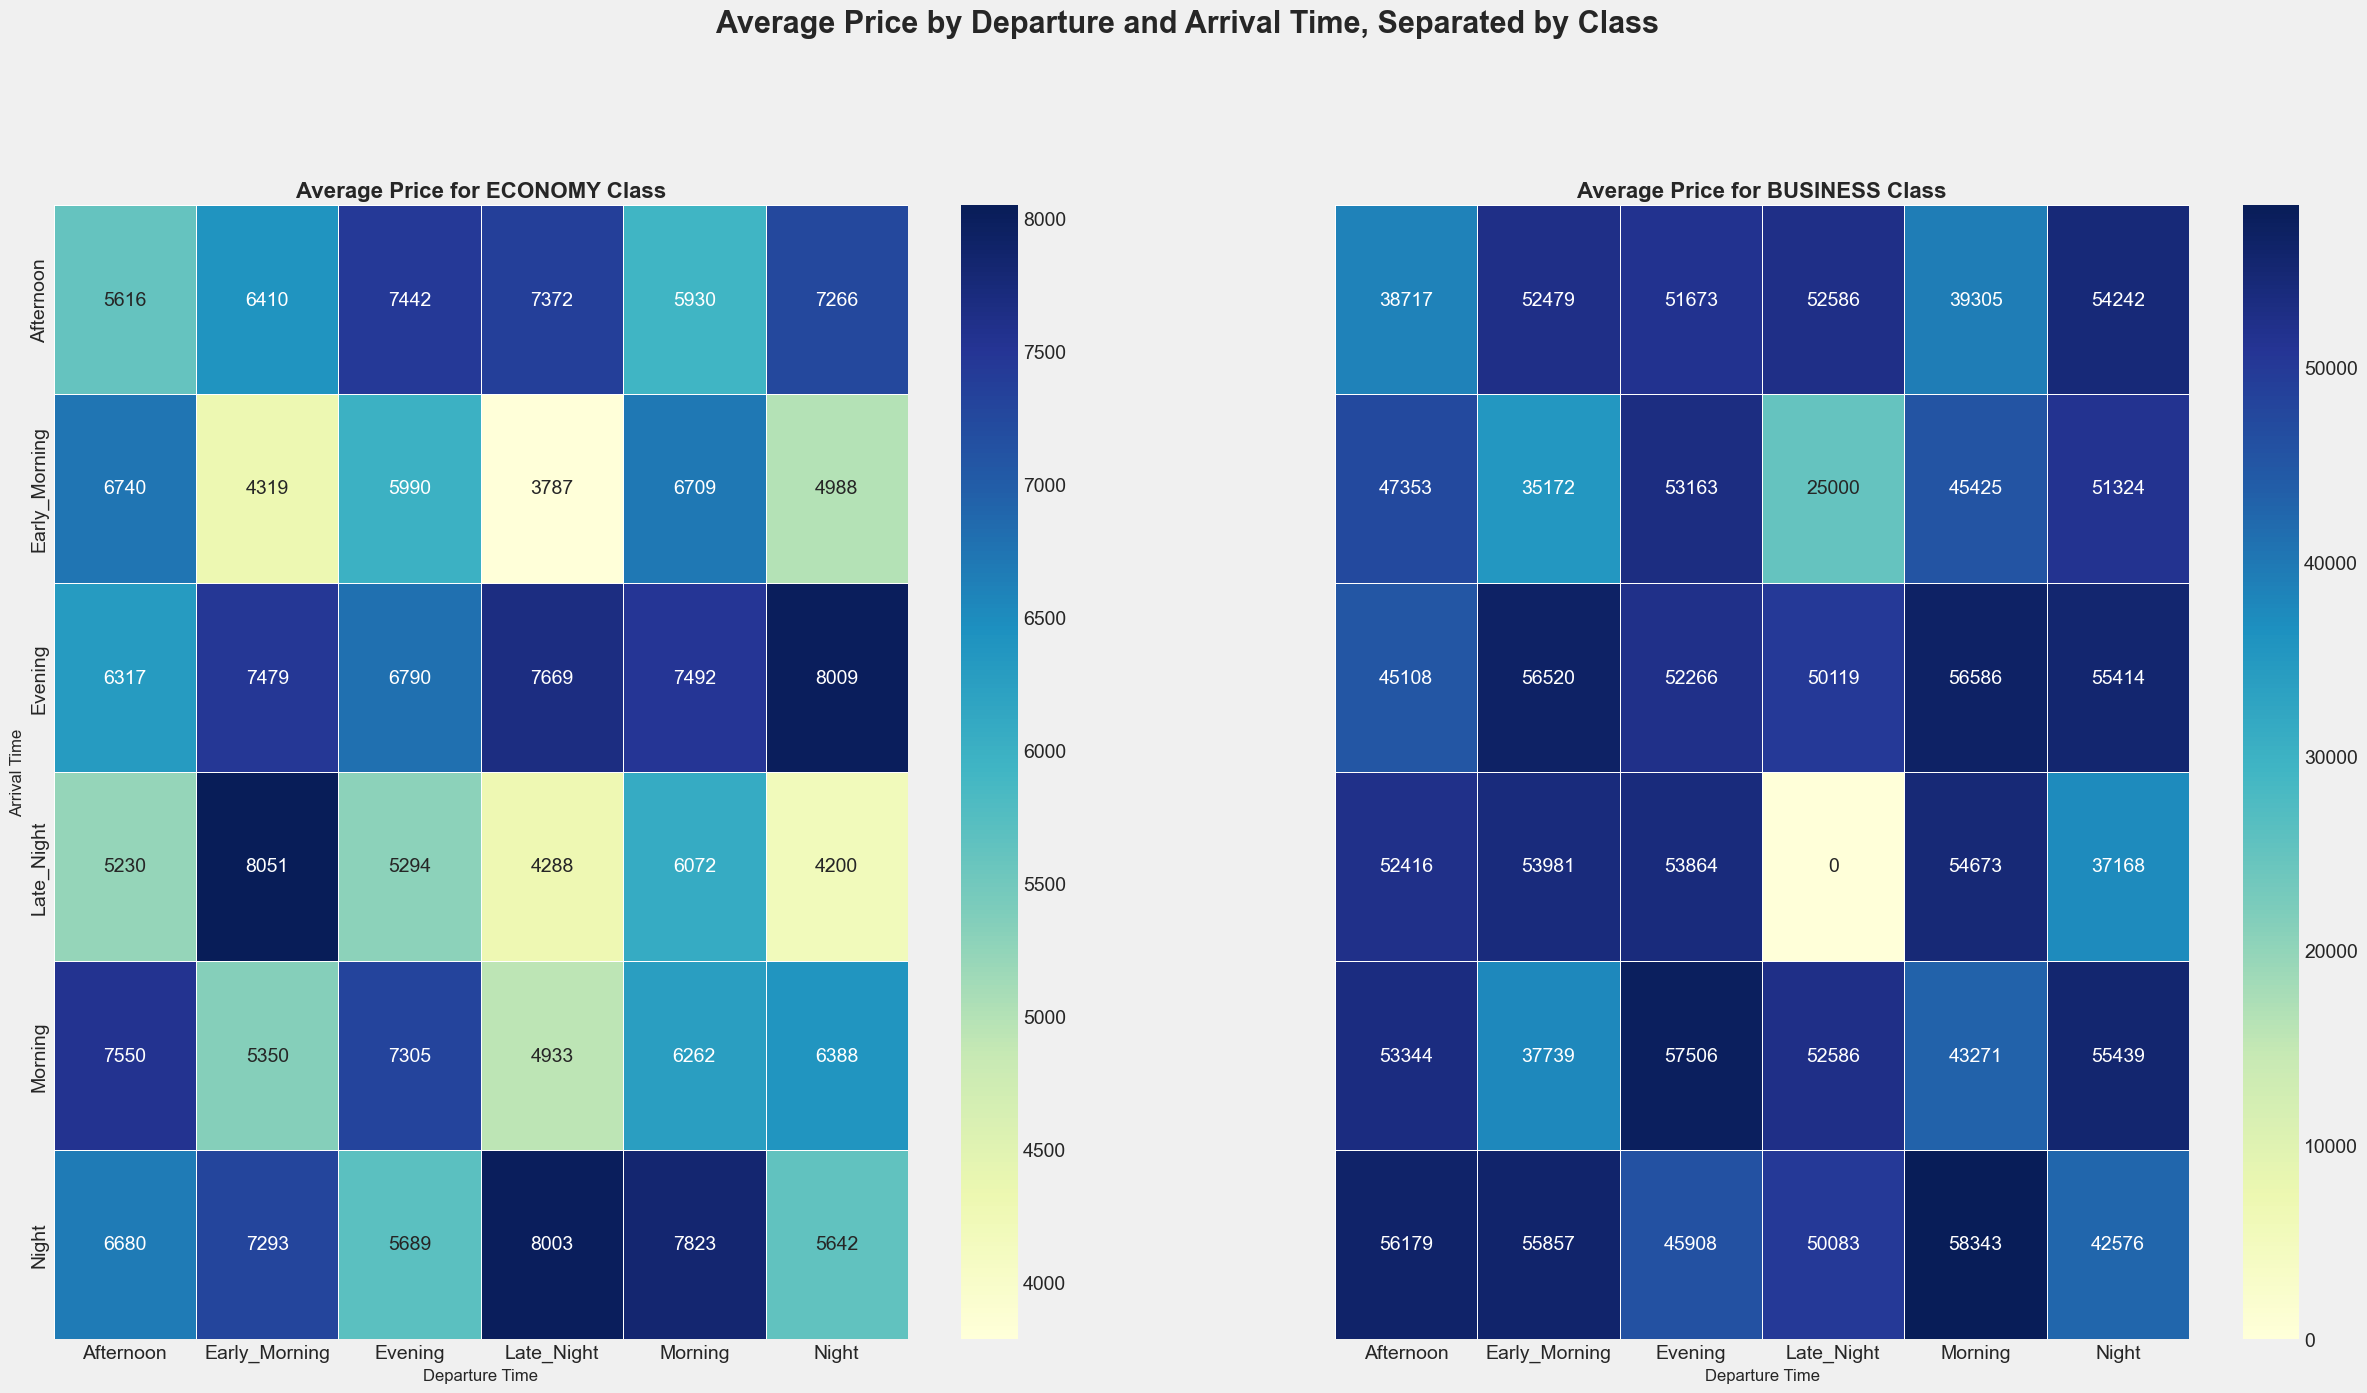

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(27, 14), sharey=True)

df['class'] = df['class'].str.lower()


# --- Heatmap for Economy Class ---

# 1. Filtering the dataframe to only include 'economy'
df_economy = df[df['class'] == 'economy']

# 2. Creating the pivot table for Economy and fill empty cells with 0
economy_pivot = df_economy.pivot_table(values='price', 
                                       index='arrival_time', 
                                       columns='departure_time', 
                                       aggfunc='mean').fillna(0)

# 3. Creating the heatmap on the first subplot (axes[0])
sns.heatmap(economy_pivot, annot=True, fmt=".0f", cmap="YlGnBu", ax=axes[0], linewidths=.5)
axes[0].set_title('Average Price for ECONOMY Class', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Departure Time', fontsize=12)
axes[0].set_ylabel('Arrival Time', fontsize=12)


# --- Heatmap for Business Class ---

# 1. Filtering the dataframe to only include 'business'
df_business = df[df['class'] == 'business']

# 2. Creating the pivot table for Business and fill empty cells with 0
business_pivot = df_business.pivot_table(values='price', 
                                         index='arrival_time', 
                                         columns='departure_time', 
                                         aggfunc='mean').fillna(0)

# 3. Creating the heatmap on the second subplot (axes[1])
sns.heatmap(business_pivot, annot=True, fmt=".0f", cmap="YlGnBu", ax=axes[1], linewidths=.5)
axes[1].set_title('Average Price for BUSINESS Class', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Departure Time', fontsize=12)
axes[1].set_ylabel('')

plt.suptitle('Average Price by Departure and Arrival Time, Separated by Class', fontsize=22, fontweight='bold', y=1.02)
plt.show()

**Analyzing the Left Heatmap (Economy Class)**

This chart shows the pricing strategy for budget-conscious travelers.

**Most Expensive Combination:** The darkest cell is 8,009. 

**Cheapest Combination:** The lightest cell is 3,787. This corresponds to departing Late_Night (x-axis) and arriving Early_Morning (y-axis).

**The Story:** For Economy class, the price differences are relatively small. Airlines seem to offer the best deals on inconvenient, overnight "red-eye" flights to fill seats. The most popular evening-to-evening slots are slightly more expensive.

**Analyzing the Right Heatmap (Business Class)**

This chart shows a completely different strategy for premium travelers.

**Most Expensive Combination:** The darkest cell is 59,586. This corresponds to departing in the Evening (x-axis) and arriving at Night(y-axis).

Another very expensive one is departing at Night and arriving in the Afternoon (58,343).

**The "0" Cell:** Look at the cell for departing Late_Night and arriving Late_Night. The value is 0. This simply means that in our entire dataset, there are no Business class tickets for this very short, off-peak combination. This makes perfect logical sense.

**The Story:** Business class pricing is not about finding the cheapest option; it's about maximizing convenience for long-haul travel. The most expensive routes are those that span many hours, allowing travelers to work a full day, fly overnight, and arrive at their destination. The price differences between the time slots are enormous.

**The Final Takeaway**
By placing these two heatmaps side-by-side, it is proof that the pricing strategy for departure and arrival times is completely different depending on the ticket class.

In [113]:
# Saving the dataset to be used for feature engineering
output_path = "data/Clean_Dataset_EDA_Processed.csv"

df.to_csv(output_path, index=False)
print(f"Data saved successfully to {output_path}")

Data saved successfully to data/Clean_Dataset_EDA_Processed.csv
